In [1]:
!git clone https://github.com/BNUCNL/dnnbrain.git

Cloning into 'dnnbrain'...
remote: Enumerating objects: 5558, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 5558 (delta 55), reused 73 (delta 34), pack-reused 5433
Receiving objects: 100% (5558/5558), 9.85 MiB | 12.38 MiB/s, done.
Resolving deltas: 100% (3580/3580), done.


In [2]:
%cd dnnbrain

/content/dnnbrain


In [4]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:484: UserWarning: Normalizing '1.0a' to '1.0a0'
  warnings.warn(tmpl.format(**locals()))
running install
running bdist_egg
running egg_info
creating dnnbrain.egg-info
writing dnnbrain.egg-info/PKG-INFO
writing dependency_links to dnnbrain.egg-info/dependency_links.txt
writing top-level names to dnnbrain.egg-info/top_level.txt
writing manifest file 'dnnbrain.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'dnnbrain.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/dnnbrain
copying dnnbrain/__init__.py -> build/lib/dnnbrain
creating build/lib/dnnbrain/brain
copying dnnbrain/brain/algo.py -> build/lib/dnnbrain/brain
copying dnnbrain/brain/io.py -> build/lib/dnnbrain/brain
copying dnnbrain/brain/__init__.py -> build/lib/dnnbrain/brain
copying dnnbrain/brain/core.py -> build/lib/dnnbrain/brai

In [5]:
!pip install nipy
!pip install cifti

     |████████████████████████████████| 2.3 MB 4.0 MB/s 


In [2]:
import os
os.environ['DNNBRAIN_DATA'] = os.path.abspath('data');
os.environ['PATH'] = os.path.abspath('bin') + ":" + os.getenv('PATH');
os.environ['PYTHONPATH'] = os.path.abspath('.') + ":" + os.getenv('PYTHONPATH');
print(os.environ['DNNBRAIN_DATA']);
print(os.environ['PATH']);
print(os.environ['PYTHONPATH']);

/content/data
/content/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
/content:/env/python


In [7]:
!mkdir data
%cd data
!mkdir models
!mkdir colors

/content/dnnbrain/data


In [8]:
#alexnet
import requests
url = "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth"
r = requests.get(url, allow_redirects = True)
models_path = os.path.abspath('models/alexnet.pth')
open(models_path, 'wb').write(r.content)


244418560

In [9]:
url = "https://osf.io/hy5m7/download"
r = requests.get(url, allow_redirects = True)
p = os.path.abspath('presented_stimuli.tar.gz')
open(p,'wb').write(r.content)

340442148

In [10]:
!tar -xvzf presented_stimuli.tar.gz

Presented_Stimuli/
Presented_Stimuli/ImageNet/
Presented_Stimuli/ImageNet/n02834397_15612.JPEG
Presented_Stimuli/ImageNet/n04099969_3551.JPEG
Presented_Stimuli/ImageNet/n02276258_5118.JPEG
Presented_Stimuli/ImageNet/n02981792_3265.JPEG
Presented_Stimuli/ImageNet/n02843684_21806.JPEG
Presented_Stimuli/ImageNet/n04399382_2877.JPEG
Presented_Stimuli/ImageNet/n02797295_13746.JPEG
Presented_Stimuli/ImageNet/n04243546_5419.JPEG
Presented_Stimuli/ImageNet/n02113799_8764.JPEG
Presented_Stimuli/ImageNet/n02087046_4402.JPEG
Presented_Stimuli/ImageNet/n02097474_11481.JPEG
Presented_Stimuli/ImageNet/n04275548_4656.JPEG
Presented_Stimuli/ImageNet/n03445924_6637.JPEG
Presented_Stimuli/ImageNet/n03944341_8299.JPEG
Presented_Stimuli/ImageNet/n03776460_19270.JPEG
Presented_Stimuli/ImageNet/n04204238_15792.JPEG
Presented_Stimuli/ImageNet/n04356056_8602.JPEG
Presented_Stimuli/ImageNet/n01601694_8281.JPEG
Presented_Stimuli/ImageNet/n03017168_3695.JPEG
Presented_Stimuli/ImageNet/n03991062_92.JPEG
Presented

In [11]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

In [13]:
import cv2
import numpy as np
from dnnbrain.utils.plot import imgarray_show

def create(width, height, rgb_color = (0,0,0)):
    image = np.zeros((height, width, 3), np.uint8)
    color = tuple(reversed(rgb_color))
    image[:] = color
    return image 

width, height = 375,375
color_list = ["black","white","red","green","blue","yellow","pink","cyan","orange","violet"]
color_list_rgb = [(0,0,0), (255,255,255), (255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255), (0,255,255), (255,102,0), (128,0,128)]
img_arrs = []
for idx, color in enumerate(color_list):
  image = create(width, height, rgb_color=color_list_rgb[idx])
  img_arrs.append(image)
  cv2.imwrite("/content/dnnbrain/data/colors/" + color + ".jpg", image)
  

In [14]:
%cd /content/dnnbrain
!rm -r brain dnn io viz __init__.py

/content/dnnbrain
rm: cannot remove 'brain': No such file or directory
rm: cannot remove 'dnn': No such file or directory
rm: cannot remove 'io': No such file or directory
rm: cannot remove 'viz': No such file or directory
rm: cannot remove '__init__.py': No such file or directory


In [15]:
%cd /content/dnnbrain
!mkdir tutorial
%cd tutorial
!mkdir scan_dnn
!mkdir probe_dnn
!mkdir map_dnn
!mkdir visualize_dnn

/content/dnnbrain
/content/dnnbrain/tutorial


In [16]:
#upload the "examples.stim.csv" and "colors.stim.csv" file from PC
%cd /content/dnnbrain/tutorial/scan_dnn

/content/dnnbrain/tutorial/scan_dnn


In [18]:
!dnn_act -net AlexNet -layer conv1_relu conv2_relu conv3_relu conv4_relu conv5_relu -stim colors.stim.csv -out AlexNet_relu_color.act.h5

Extracted activation of conv1_relu: 8/10
Extracted activation of conv1_relu: 10/10
Extracted activation of conv2_relu: 8/10
Extracted activation of conv2_relu: 10/10
Extracted activation of conv3_relu: 8/10
Extracted activation of conv3_relu: 10/10
Extracted activation of conv4_relu: 8/10
Extracted activation of conv4_relu: 10/10
Extracted activation of conv5_relu: 8/10
Extracted activation of conv5_relu: 10/10


In [19]:
!dnn_act -net AlexNet -layer conv1_relu conv2_relu conv3_relu conv4_relu conv5_relu -stim examples.stim.csv -out AlexNet_relu.act.h5

Extracted activation of conv1_relu: 3/3
Extracted activation of conv2_relu: 3/3
Extracted activation of conv3_relu: 3/3
Extracted activation of conv4_relu: 3/3
Extracted activation of conv5_relu: 3/3


In [20]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

maximal channel indices:
 [[ 52 154 216  56  77]
 [  8 129 233  19  26]
 [ 40 134  30 254 133]]


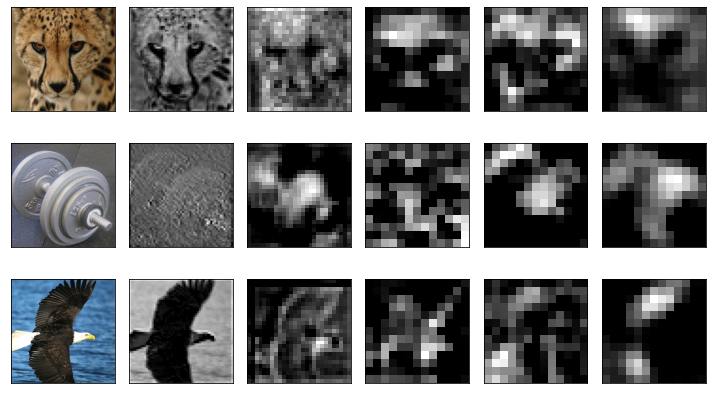

In [21]:
import numpy as np

from os.path import join as pjoin
from matplotlib import pyplot as plt
from dnnbrain.dnn.core import Activation, Stimulus
from dnnbrain.utils.plot import imgarray_show

# initialize an array to save maximal channel indices
n_img = 3  # the number of example images
n_layer = 5  # the number of Conv layers
max_chn_indices = np.zeros((n_img, n_layer), np.int64)

# load feature maps
activ = Activation()
activ.load('AlexNet_relu.act.h5')

# find maximal channel indices for each layer
activ_pool = activ.pool('mean')  # calculate mean value of each channel
for idx, layer in enumerate(activ_pool.layers):
    data = activ_pool.get(layer).squeeze()
    max_chn_indices[:, idx] = np.argmax(data, 1)
print('maximal channel indices:\n', max_chn_indices)

# load stimulus information
stim = Stimulus()
stim.load('examples.stim.csv')

# plot original images and feature maps
img_arrs = []
for idx, row in enumerate(max_chn_indices):
    ori_file = pjoin(stim.header['path'], stim.get('stimID')[idx])  # get path of the original file
    img_arrs.append(plt.imread(ori_file))
    for lyr_idx, max_chn_idx in enumerate(row):
        layer = activ.layers[lyr_idx]
        img_arrs.append(activ.get(layer)[idx, max_chn_idx])
imgarray_show(img_arrs, nrows=n_img, ncols=n_layer+1, cmap='gray')

In [22]:
cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean']


maximal channel indices:
 [[ 36   7 232  52  39]
 [ 35   6 369 163 111]
 [ 19  93 245 163  32]
 [ 37 174  97 163 158]
 [ 52 112 232 125 106]
 [ 21   6  51 163  83]
 [ 21 174 364 220 139]
 [ 21   6  51 163  83]
 [ 53 145 285 163 158]
 [ 37 174 364 163 158]]


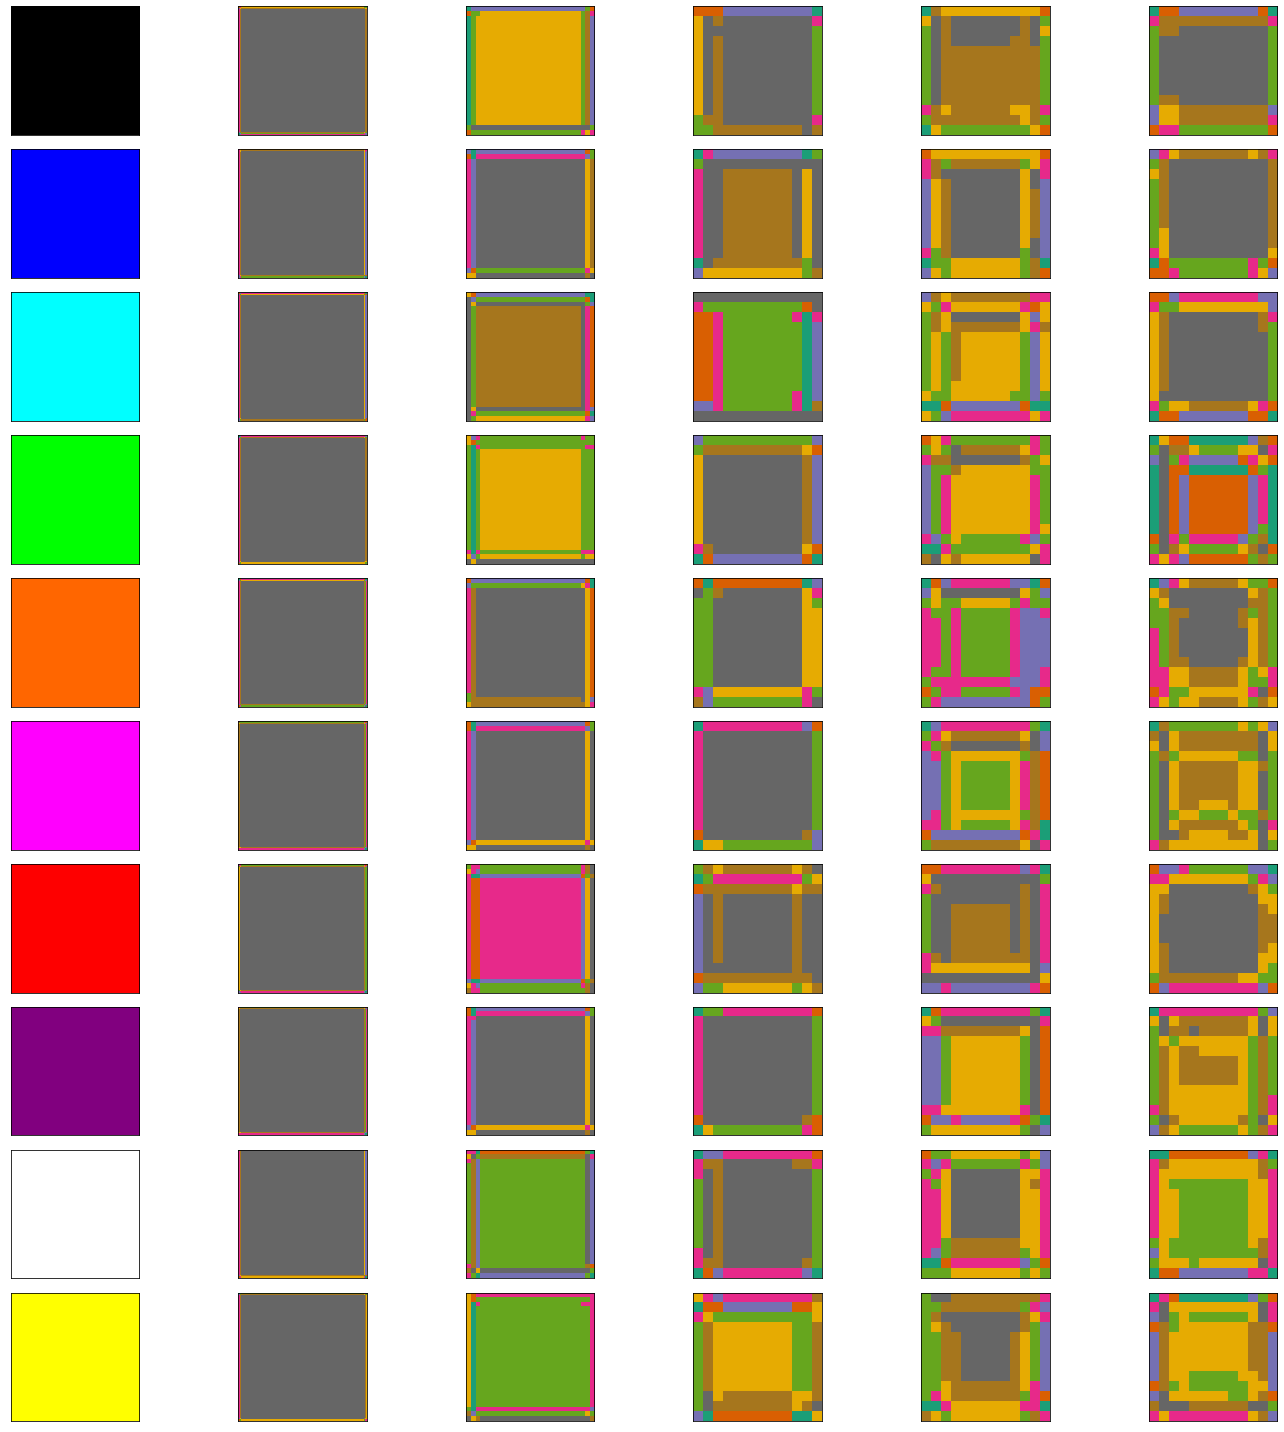

In [23]:
import numpy as np

from os.path import join as pjoin
from matplotlib import pyplot as plt
from dnnbrain.dnn.core import Activation, Stimulus
from dnnbrain.utils.plot import imgarray_show

# initialize an array to save maximal channel indices
n_img = 10  # the number of example images
n_layer = 5  # the number of Conv layers
max_chn_indices = np.zeros((n_img, n_layer), np.int64)

# load feature maps
activ = Activation()
activ.load('AlexNet_relu_color.act.h5')

# find maximal channel indices for each layer
activ_pool = activ.pool('mean')  # calculate mean value of each channel
for idx, layer in enumerate(activ_pool.layers):
    data = activ_pool.get(layer).squeeze()
    max_chn_indices[:, idx] = np.argmax(data, 1)
print('maximal channel indices:\n', max_chn_indices)

# load stimulus information
stim = Stimulus()
stim.load('colors.stim.csv')

# plot original images and feature maps
img_arrs = []
for idx, row in enumerate(max_chn_indices):
    ori_file = pjoin(stim.header['path'], stim.get('stimID')[idx])  # get path of the original file
    img_arrs.append(plt.imread(ori_file))
    for lyr_idx, max_chn_idx in enumerate(row):
        layer = activ.layers[lyr_idx]
        img_arrs.append(activ.get(layer)[idx, max_chn_idx])

imgarray_show(img_arrs, nrows=n_img, ncols=n_layer+1, figsize=(20,20), cmap='Dark2_r')

In [24]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py

/content/dnnbrain


In [ ]:
## PROBE CNN ##

In [25]:
%cd /content/dnnbrain/tutorial/probe_dnn
#upload the "all_5000scenes.stim.csv" file from PC

/content/dnnbrain/tutorial/probe_dnn


In [ ]:
# Big layers so download one by one
#!dnn_act -net AlexNet -layer conv1 conv2 conv3 conv4 conv5 fc1 fc2 -stim all_5000scenes.stim.csv -out AlexNet.act.h5 -cuda
#!dnn_act -net AlexNet -layer conv1_relu conv2_relu conv3_relu conv4_relu conv5_relu fc1_relu fc2_relu -stim all_5000scenes.stim.csv -out Al

In [ ]:
!dnn_act -net AlexNet -layer conv1 -stim all_5000scenes.stim.csv -out AlexNet1.act.h5 

Extracted activation of conv1: 8/4916
Extracted activation of conv1: 16/4916
Extracted activation of conv1: 24/4916
Extracted activation of conv1: 32/4916
Extracted activation of conv1: 40/4916
Extracted activation of conv1: 48/4916
Extracted activation of conv1: 56/4916
Extracted activation of conv1: 64/4916
Extracted activation of conv1: 72/4916
Extracted activation of conv1: 80/4916
Extracted activation of conv1: 88/4916
Extracted activation of conv1: 96/4916
Extracted activation of conv1: 104/4916
Extracted activation of conv1: 112/4916
Extracted activation of conv1: 120/4916
Extracted activation of conv1: 128/4916
Extracted activation of conv1: 136/4916
Extracted activation of conv1: 144/4916
Extracted activation of conv1: 152/4916
Extracted activation of conv1: 160/4916
Extracted activation of conv1: 168/4916
Extracted activation of conv1: 176/4916
Extracted activation of conv1: 184/4916
Extracted activation of conv1: 192/4916
Extracted activation of conv1: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer conv2 -stim all_5000scenes.stim.csv -out AlexNet2.act.h5 

Extracted activation of conv2: 8/4916
Extracted activation of conv2: 16/4916
Extracted activation of conv2: 24/4916
Extracted activation of conv2: 32/4916
Extracted activation of conv2: 40/4916
Extracted activation of conv2: 48/4916
Extracted activation of conv2: 56/4916
Extracted activation of conv2: 64/4916
Extracted activation of conv2: 72/4916
Extracted activation of conv2: 80/4916
Extracted activation of conv2: 88/4916
Extracted activation of conv2: 96/4916
Extracted activation of conv2: 104/4916
Extracted activation of conv2: 112/4916
Extracted activation of conv2: 120/4916
Extracted activation of conv2: 128/4916
Extracted activation of conv2: 136/4916
Extracted activation of conv2: 144/4916
Extracted activation of conv2: 152/4916
Extracted activation of conv2: 160/4916
Extracted activation of conv2: 168/4916
Extracted activation of conv2: 176/4916
Extracted activation of conv2: 184/4916
Extracted activation of conv2: 192/4916
Extracted activation of conv2: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer conv3 -stim all_5000scenes.stim.csv -out AlexNet3.act.h5 

Extracted activation of conv3: 8/4916
Extracted activation of conv3: 16/4916
Extracted activation of conv3: 24/4916
Extracted activation of conv3: 32/4916
Extracted activation of conv3: 40/4916
Extracted activation of conv3: 48/4916
Extracted activation of conv3: 56/4916
Extracted activation of conv3: 64/4916
Extracted activation of conv3: 72/4916
Extracted activation of conv3: 80/4916
Extracted activation of conv3: 88/4916
Extracted activation of conv3: 96/4916
Extracted activation of conv3: 104/4916
Extracted activation of conv3: 112/4916
Extracted activation of conv3: 120/4916
Extracted activation of conv3: 128/4916
Extracted activation of conv3: 136/4916
Extracted activation of conv3: 144/4916
Extracted activation of conv3: 152/4916
Extracted activation of conv3: 160/4916
Extracted activation of conv3: 168/4916
Extracted activation of conv3: 176/4916
Extracted activation of conv3: 184/4916
Extracted activation of conv3: 192/4916
Extracted activation of conv3: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer conv4 -stim all_5000scenes.stim.csv -out AlexNet4.act.h5 

Extracted activation of conv4: 8/4916
Extracted activation of conv4: 16/4916
Extracted activation of conv4: 24/4916
Extracted activation of conv4: 32/4916
Extracted activation of conv4: 40/4916
Extracted activation of conv4: 48/4916
Extracted activation of conv4: 56/4916
Extracted activation of conv4: 64/4916
Extracted activation of conv4: 72/4916
Extracted activation of conv4: 80/4916
Extracted activation of conv4: 88/4916
Extracted activation of conv4: 96/4916
Extracted activation of conv4: 104/4916
Extracted activation of conv4: 112/4916
Extracted activation of conv4: 120/4916
Extracted activation of conv4: 128/4916
Extracted activation of conv4: 136/4916
Extracted activation of conv4: 144/4916
Extracted activation of conv4: 152/4916
Extracted activation of conv4: 160/4916
Extracted activation of conv4: 168/4916
Extracted activation of conv4: 176/4916
Extracted activation of conv4: 184/4916
Extracted activation of conv4: 192/4916
Extracted activation of conv4: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer conv5 -stim all_5000scenes.stim.csv -out AlexNet5.act.h5 

Extracted activation of conv5: 8/4916
Extracted activation of conv5: 16/4916
Extracted activation of conv5: 24/4916
Extracted activation of conv5: 32/4916
Extracted activation of conv5: 40/4916
Extracted activation of conv5: 48/4916
Extracted activation of conv5: 56/4916
Extracted activation of conv5: 64/4916
Extracted activation of conv5: 72/4916
Extracted activation of conv5: 80/4916
Extracted activation of conv5: 88/4916
Extracted activation of conv5: 96/4916
Extracted activation of conv5: 104/4916
Extracted activation of conv5: 112/4916
Extracted activation of conv5: 120/4916
Extracted activation of conv5: 128/4916
Extracted activation of conv5: 136/4916
Extracted activation of conv5: 144/4916
Extracted activation of conv5: 152/4916
Extracted activation of conv5: 160/4916
Extracted activation of conv5: 168/4916
Extracted activation of conv5: 176/4916
Extracted activation of conv5: 184/4916
Extracted activation of conv5: 192/4916
Extracted activation of conv5: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer fc1 -stim all_5000scenes.stim.csv -out AlexNet6.act.h5 

Extracted activation of fc1: 8/4916
Extracted activation of fc1: 16/4916
Extracted activation of fc1: 24/4916
Extracted activation of fc1: 32/4916
Extracted activation of fc1: 40/4916
Extracted activation of fc1: 48/4916
Extracted activation of fc1: 56/4916
Extracted activation of fc1: 64/4916
Extracted activation of fc1: 72/4916
Extracted activation of fc1: 80/4916
Extracted activation of fc1: 88/4916
Extracted activation of fc1: 96/4916
Extracted activation of fc1: 104/4916
Extracted activation of fc1: 112/4916
Extracted activation of fc1: 120/4916
Extracted activation of fc1: 128/4916
Extracted activation of fc1: 136/4916
Extracted activation of fc1: 144/4916
Extracted activation of fc1: 152/4916
Extracted activation of fc1: 160/4916
Extracted activation of fc1: 168/4916
Extracted activation of fc1: 176/4916
Extracted activation of fc1: 184/4916
Extracted activation of fc1: 192/4916
Extracted activation of fc1: 200/4916
Extracted activation of fc1: 208/4916
Extracted activation of f

In [ ]:
!dnn_act -net AlexNet -layer fc2 -stim all_5000scenes.stim.csv -out AlexNet7.act.h5 

Extracted activation of fc2: 8/4916
Extracted activation of fc2: 16/4916
Extracted activation of fc2: 24/4916
Extracted activation of fc2: 32/4916
Extracted activation of fc2: 40/4916
Extracted activation of fc2: 48/4916
Extracted activation of fc2: 56/4916
Extracted activation of fc2: 64/4916
Extracted activation of fc2: 72/4916
Extracted activation of fc2: 80/4916
Extracted activation of fc2: 88/4916
Extracted activation of fc2: 96/4916
Extracted activation of fc2: 104/4916
Extracted activation of fc2: 112/4916
Extracted activation of fc2: 120/4916
Extracted activation of fc2: 128/4916
Extracted activation of fc2: 136/4916
Extracted activation of fc2: 144/4916
Extracted activation of fc2: 152/4916
Extracted activation of fc2: 160/4916
Extracted activation of fc2: 168/4916
Extracted activation of fc2: 176/4916
Extracted activation of fc2: 184/4916
Extracted activation of fc2: 192/4916
Extracted activation of fc2: 200/4916
Extracted activation of fc2: 208/4916
Extracted activation of f

In [ ]:
!dnn_act -net AlexNet -layer conv1_relu -stim all_5000scenes.stim.csv -out AlexNet_relu1.act.h5 

Extracted activation of conv1_relu: 8/4916
Extracted activation of conv1_relu: 16/4916
Extracted activation of conv1_relu: 24/4916
Extracted activation of conv1_relu: 32/4916
Extracted activation of conv1_relu: 40/4916
Extracted activation of conv1_relu: 48/4916
Extracted activation of conv1_relu: 56/4916
Extracted activation of conv1_relu: 64/4916
Extracted activation of conv1_relu: 72/4916
Extracted activation of conv1_relu: 80/4916
Extracted activation of conv1_relu: 88/4916
Extracted activation of conv1_relu: 96/4916
Extracted activation of conv1_relu: 104/4916
Extracted activation of conv1_relu: 112/4916
Extracted activation of conv1_relu: 120/4916
Extracted activation of conv1_relu: 128/4916
Extracted activation of conv1_relu: 136/4916
Extracted activation of conv1_relu: 144/4916
Extracted activation of conv1_relu: 152/4916
Extracted activation of conv1_relu: 160/4916
Extracted activation of conv1_relu: 168/4916
Extracted activation of conv1_relu: 176/4916
Extracted activation of

In [26]:
!dnn_act -net AlexNet -layer conv2_relu -stim all_5000scenes.stim.csv -out AlexNet_relu2.act.h5 

Extracted activation of conv2_relu: 8/4916
Extracted activation of conv2_relu: 16/4916
Extracted activation of conv2_relu: 24/4916
Extracted activation of conv2_relu: 32/4916
Extracted activation of conv2_relu: 40/4916
Extracted activation of conv2_relu: 48/4916
Extracted activation of conv2_relu: 56/4916
Extracted activation of conv2_relu: 64/4916
Extracted activation of conv2_relu: 72/4916
Extracted activation of conv2_relu: 80/4916
Extracted activation of conv2_relu: 88/4916
Extracted activation of conv2_relu: 96/4916
Extracted activation of conv2_relu: 104/4916
Extracted activation of conv2_relu: 112/4916
Extracted activation of conv2_relu: 120/4916
Extracted activation of conv2_relu: 128/4916
Extracted activation of conv2_relu: 136/4916
Extracted activation of conv2_relu: 144/4916
Extracted activation of conv2_relu: 152/4916
Extracted activation of conv2_relu: 160/4916
Extracted activation of conv2_relu: 168/4916
Extracted activation of conv2_relu: 176/4916
Extracted activation of

In [27]:
!dnn_act -net AlexNet -layer conv3_relu -stim all_5000scenes.stim.csv -out AlexNet_relu3.act.h5 

Extracted activation of conv3_relu: 8/4916
Extracted activation of conv3_relu: 16/4916
Extracted activation of conv3_relu: 24/4916
Extracted activation of conv3_relu: 32/4916
Extracted activation of conv3_relu: 40/4916
Extracted activation of conv3_relu: 48/4916
Extracted activation of conv3_relu: 56/4916
Extracted activation of conv3_relu: 64/4916
Extracted activation of conv3_relu: 72/4916
Extracted activation of conv3_relu: 80/4916
Extracted activation of conv3_relu: 88/4916
Extracted activation of conv3_relu: 96/4916
Extracted activation of conv3_relu: 104/4916
Extracted activation of conv3_relu: 112/4916
Extracted activation of conv3_relu: 120/4916
Extracted activation of conv3_relu: 128/4916
Extracted activation of conv3_relu: 136/4916
Extracted activation of conv3_relu: 144/4916
Extracted activation of conv3_relu: 152/4916
Extracted activation of conv3_relu: 160/4916
Extracted activation of conv3_relu: 168/4916
Extracted activation of conv3_relu: 176/4916
Extracted activation of

In [28]:
!dnn_act -net AlexNet -layer conv4_relu -stim all_5000scenes.stim.csv -out AlexNet_relu4.act.h5 

Extracted activation of conv4_relu: 8/4916
Extracted activation of conv4_relu: 16/4916
Extracted activation of conv4_relu: 24/4916
Extracted activation of conv4_relu: 32/4916
Extracted activation of conv4_relu: 40/4916
Extracted activation of conv4_relu: 48/4916
Extracted activation of conv4_relu: 56/4916
Extracted activation of conv4_relu: 64/4916
Extracted activation of conv4_relu: 72/4916
Extracted activation of conv4_relu: 80/4916
Extracted activation of conv4_relu: 88/4916
Extracted activation of conv4_relu: 96/4916
Extracted activation of conv4_relu: 104/4916
Extracted activation of conv4_relu: 112/4916
Extracted activation of conv4_relu: 120/4916
Extracted activation of conv4_relu: 128/4916
Extracted activation of conv4_relu: 136/4916
Extracted activation of conv4_relu: 144/4916
Extracted activation of conv4_relu: 152/4916
Extracted activation of conv4_relu: 160/4916
Extracted activation of conv4_relu: 168/4916
Extracted activation of conv4_relu: 176/4916
Extracted activation of

In [29]:
!dnn_act -net AlexNet -layer conv5_relu -stim all_5000scenes.stim.csv -out AlexNet_relu5.act.h5 

Extracted activation of conv5_relu: 8/4916
Extracted activation of conv5_relu: 16/4916
Extracted activation of conv5_relu: 24/4916
Extracted activation of conv5_relu: 32/4916
Extracted activation of conv5_relu: 40/4916
Extracted activation of conv5_relu: 48/4916
Extracted activation of conv5_relu: 56/4916
Extracted activation of conv5_relu: 64/4916
Extracted activation of conv5_relu: 72/4916
Extracted activation of conv5_relu: 80/4916
Extracted activation of conv5_relu: 88/4916
Extracted activation of conv5_relu: 96/4916
Extracted activation of conv5_relu: 104/4916
Extracted activation of conv5_relu: 112/4916
Extracted activation of conv5_relu: 120/4916
Extracted activation of conv5_relu: 128/4916
Extracted activation of conv5_relu: 136/4916
Extracted activation of conv5_relu: 144/4916
Extracted activation of conv5_relu: 152/4916
Extracted activation of conv5_relu: 160/4916
Extracted activation of conv5_relu: 168/4916
Extracted activation of conv5_relu: 176/4916
Extracted activation of

In [ ]:
!dnn_act -net AlexNet -layer fc1_relu -stim all_5000scenes.stim.csv -out AlexNet_relu6.act.h5 

Extracted activation of fc1_relu: 8/4916
Extracted activation of fc1_relu: 16/4916
Extracted activation of fc1_relu: 24/4916
Extracted activation of fc1_relu: 32/4916
Extracted activation of fc1_relu: 40/4916
Extracted activation of fc1_relu: 48/4916
Extracted activation of fc1_relu: 56/4916
Extracted activation of fc1_relu: 64/4916
Extracted activation of fc1_relu: 72/4916
Extracted activation of fc1_relu: 80/4916
Extracted activation of fc1_relu: 88/4916
Extracted activation of fc1_relu: 96/4916
Extracted activation of fc1_relu: 104/4916
Extracted activation of fc1_relu: 112/4916
Extracted activation of fc1_relu: 120/4916
Extracted activation of fc1_relu: 128/4916
Extracted activation of fc1_relu: 136/4916
Extracted activation of fc1_relu: 144/4916
Extracted activation of fc1_relu: 152/4916
Extracted activation of fc1_relu: 160/4916
Extracted activation of fc1_relu: 168/4916
Extracted activation of fc1_relu: 176/4916
Extracted activation of fc1_relu: 184/4916
Extracted activation of 

In [ ]:
!dnn_act -net AlexNet -layer fc2_relu -stim all_5000scenes.stim.csv -out AlexNet_relu7.act.h5 

Extracted activation of fc2_relu: 8/4916
Extracted activation of fc2_relu: 16/4916
Extracted activation of fc2_relu: 24/4916
Extracted activation of fc2_relu: 32/4916
Extracted activation of fc2_relu: 40/4916
Extracted activation of fc2_relu: 48/4916
Extracted activation of fc2_relu: 56/4916
Extracted activation of fc2_relu: 64/4916
Extracted activation of fc2_relu: 72/4916
Extracted activation of fc2_relu: 80/4916
Extracted activation of fc2_relu: 88/4916
Extracted activation of fc2_relu: 96/4916
Extracted activation of fc2_relu: 104/4916
Extracted activation of fc2_relu: 112/4916
Extracted activation of fc2_relu: 120/4916
Extracted activation of fc2_relu: 128/4916
Extracted activation of fc2_relu: 136/4916
Extracted activation of fc2_relu: 144/4916
Extracted activation of fc2_relu: 152/4916
Extracted activation of fc2_relu: 160/4916
Extracted activation of fc2_relu: 168/4916
Extracted activation of fc2_relu: 176/4916
Extracted activation of fc2_relu: 184/4916
Extracted activation of 

In [30]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

In [31]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from dnnbrain.dnn.core import DnnProbe, Activation, Stimulus


def probe(fname):

    # load DNN activation
    activ = Activation()
    activ.load(fname)

    # load labels
    stim = Stimulus()
    stim.load('all_5000scenes.stim.csv')
    labels = stim.get('label')[:, None]

    # build pipeline with PCA and LogisticRegression
    pipe = make_pipeline(PCA(100), LogisticRegression())

    # initialize probe method with DNN activation
    # mv: multivariate mapping
    # 10-fold cross validation
    probe = DnnProbe(activ, 'mv', pipe, 10)

    # probe label layer-wisely
    probe_dict = probe.probe(labels)

    # save out
    out_dir = 'AlexNet_PCA-100_lrc_label_cv-10'
    for layer, data in probe_dict.items():
        # prepare directory
        trg_dir = pjoin(out_dir, layer)
        if not os.path.isdir(trg_dir):
            os.makedirs(trg_dir)

        # saving
        for k, v in data.items():
            np.save(pjoin(trg_dir, k), v)

In [32]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py

/content/dnnbrain


In [33]:
%cd /content/dnnbrain/tutorial/probe_dnn

/content/dnnbrain/tutorial/probe_dnn


In [ ]:
#very big layer - RAM limit exceeded
probe('AlexNet1.act.h5')

Start mapping:


In [ ]:
probe('AlexNet2.act.h5')

In [ ]:
probe('AlexNet3.act.h5')

In [ ]:
probe('AlexNet4.act.h5')

In [ ]:
probe('AlexNet5.act.h5')

Start mapping:
Finish target 1/1 in 180.41335129737854 seconds.
Finish mapping in 180.41433382034302 seconds.
Layer-conv5 iter-1/1


In [ ]:
probe('AlexNet6.act.h5')

Start mapping:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Finish target 1/1 in 29.827293395996094 seconds.
Finish mapping in 29.828181505203247 seconds.
Layer-fc1 iter-1/1


In [ ]:
probe('AlexNet7.act.h5')

Start mapping:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Finish target 1/1 in 29.63243818283081 seconds.
Finish mapping in 29.6333429813385 seconds.
Layer-fc2 iter-1/1


In [ ]:
#very big layer - RAM limit exceeded
probe('AlexNet_relu1.act.h5')

In [37]:
probe('AlexNet_relu2.act.h5')

Start mapping:
Finish target 1/1 in 691.5814800262451 seconds.
Finish mapping in 691.5824780464172 seconds.
Layer-conv2_relu iter-1/1


In [38]:
probe('AlexNet_relu3.act.h5')

Start mapping:
Finish target 1/1 in 319.6066470146179 seconds.
Finish mapping in 319.6077890396118 seconds.
Layer-conv3_relu iter-1/1


In [39]:
probe('AlexNet_relu4.act.h5')

Start mapping:
Finish target 1/1 in 216.43575429916382 seconds.
Finish mapping in 216.4371109008789 seconds.
Layer-conv4_relu iter-1/1


In [40]:
probe('AlexNet_relu5.act.h5')

Start mapping:
Finish target 1/1 in 213.94661283493042 seconds.
Finish mapping in 213.9468595981598 seconds.
Layer-conv5_relu iter-1/1


In [ ]:
probe('AlexNet_relu6.act.h5')

Start mapping:
Finish target 1/1 in 28.87225651741028 seconds.
Finish mapping in 28.873119592666626 seconds.
Layer-fc1_relu iter-1/1


In [ ]:
probe('AlexNet_relu7.act.h5')

Start mapping:
Finish target 1/1 in 28.850415229797363 seconds.
Finish mapping in 28.851349353790283 seconds.
Layer-fc2_relu iter-1/1


In [43]:
import numpy as np
from os.path import join as pjoin
from scipy.stats import sem
from matplotlib import pyplot as plt

data_dir = 'AlexNet_PCA-100_lrc_label_cv-10'

# prepare layer names
layer_groups = [
    ['conv2', 'conv3', 'conv4', 'conv5', 'fc1', 'fc2'],
    ['conv2_relu', 'conv3_relu', 'conv4_relu', 'conv5_relu', 'fc1_relu', 'fc2_relu']]
n_row = len(layer_groups)
n_col = len(layer_groups[0])

# calculate mean and SEM
ys = np.zeros((n_row, n_col))
ys_err = np.zeros((n_row, n_col))
for row_idx, layers in enumerate(layer_groups):
    for col_idx, layer in enumerate(layers):
        scores = np.load(pjoin(data_dir, layer, 'score.npy')).squeeze()
        ys[row_idx, col_idx] = np.mean(scores)
        ys_err[row_idx, col_idx] = sem(scores)

# plot
plt.figure(figsize=(6, 4))
x = np.arange(n_col)
width = 0.43
plt.bar(x - width/2, ys[0], width, yerr=ys_err[0], color='lime', label='Conv')
plt.bar(x + width/2, ys[1], width, yerr=ys_err[1], color='dodgerblue', label='ReLU')
plt.ylim(0.55)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title(data_dir)
plt.xticks(x, ['Conv2', 'Conv3', 'Conv4', 'Conv5', 'FC1', 'FC2'])
plt.ylabel('accuracy')
plt.legend()
plt.tight_layout()
plt.show()

FileNotFoundError: ignored

In [ ]:
!zip -r /content/dnnbrain/tutorial.zip /content/dnnbrain/tutorial

  adding: content/dnnbrain/tutorial/ (stored 0%)
  adding: content/dnnbrain/tutorial/map_dnn/ (stored 0%)
  adding: content/dnnbrain/tutorial/map_dnn/AlexNet_relu3.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/map_dnn/AlexNet_relu2.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/map_dnn/all_5000scenes.stim.csv (deflated 79%)
  adding: content/dnnbrain/tutorial/map_dnn/AlexNet_relu4.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/map_dnn/AlexNet_relu5.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/map_dnn/AlexNet_relu1.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/ (stored 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet2.act.h5


zip error: Interrupted (aborting)


In [ ]:
from google.colab import files
files.download("/content/dnnbrain/tutorial.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## MAP_DNN ##

In [4]:
#add "all_5000scenes.stim.csv" from PC
%cd /content/dnnbrain/tutorial/map_dnn

/content/dnnbrain/tutorial/map_dnn


In [ ]:
!dnn_act -net AlexNet -layer conv1_relu -stim all_5000scenes.stim.csv -out AlexNet_relu1.act.h5 

Extracted activation of conv1_relu: 8/4916
Extracted activation of conv1_relu: 16/4916
Extracted activation of conv1_relu: 24/4916
Extracted activation of conv1_relu: 32/4916
Extracted activation of conv1_relu: 40/4916
Extracted activation of conv1_relu: 48/4916
Extracted activation of conv1_relu: 56/4916
Extracted activation of conv1_relu: 64/4916
Extracted activation of conv1_relu: 72/4916
Extracted activation of conv1_relu: 80/4916
Extracted activation of conv1_relu: 88/4916
Extracted activation of conv1_relu: 96/4916
Extracted activation of conv1_relu: 104/4916
Extracted activation of conv1_relu: 112/4916
Extracted activation of conv1_relu: 120/4916
Extracted activation of conv1_relu: 128/4916
Extracted activation of conv1_relu: 136/4916
Extracted activation of conv1_relu: 144/4916
Extracted activation of conv1_relu: 152/4916
Extracted activation of conv1_relu: 160/4916
Extracted activation of conv1_relu: 168/4916
Extracted activation of conv1_relu: 176/4916
Extracted activation of

In [45]:
!dnn_act -net AlexNet -layer conv2_relu -stim all_5000scenes.stim.csv -out AlexNet_relu2.act.h5 

Extracted activation of conv2_relu: 8/4916
Extracted activation of conv2_relu: 16/4916
Extracted activation of conv2_relu: 24/4916
Extracted activation of conv2_relu: 32/4916
Extracted activation of conv2_relu: 40/4916
Extracted activation of conv2_relu: 48/4916
Extracted activation of conv2_relu: 56/4916
Extracted activation of conv2_relu: 64/4916
Extracted activation of conv2_relu: 72/4916
Extracted activation of conv2_relu: 80/4916
Extracted activation of conv2_relu: 88/4916
Extracted activation of conv2_relu: 96/4916
Extracted activation of conv2_relu: 104/4916
Extracted activation of conv2_relu: 112/4916
Extracted activation of conv2_relu: 120/4916
Extracted activation of conv2_relu: 128/4916
Extracted activation of conv2_relu: 136/4916
Extracted activation of conv2_relu: 144/4916
Extracted activation of conv2_relu: 152/4916
Extracted activation of conv2_relu: 160/4916
Extracted activation of conv2_relu: 168/4916
Extracted activation of conv2_relu: 176/4916
Extracted activation of

In [46]:
!dnn_act -net AlexNet -layer conv3_relu -stim all_5000scenes.stim.csv -out AlexNet_relu3.act.h5 

Extracted activation of conv3_relu: 8/4916
Extracted activation of conv3_relu: 16/4916
Extracted activation of conv3_relu: 24/4916
Extracted activation of conv3_relu: 32/4916
Extracted activation of conv3_relu: 40/4916
Extracted activation of conv3_relu: 48/4916
Extracted activation of conv3_relu: 56/4916
Extracted activation of conv3_relu: 64/4916
Extracted activation of conv3_relu: 72/4916
Extracted activation of conv3_relu: 80/4916
Extracted activation of conv3_relu: 88/4916
Extracted activation of conv3_relu: 96/4916
Extracted activation of conv3_relu: 104/4916
Extracted activation of conv3_relu: 112/4916
Extracted activation of conv3_relu: 120/4916
Extracted activation of conv3_relu: 128/4916
Extracted activation of conv3_relu: 136/4916
Extracted activation of conv3_relu: 144/4916
Extracted activation of conv3_relu: 152/4916
Extracted activation of conv3_relu: 160/4916
Extracted activation of conv3_relu: 168/4916
Extracted activation of conv3_relu: 176/4916
Extracted activation of

In [47]:
!dnn_act -net AlexNet -layer conv4_relu -stim all_5000scenes.stim.csv -out AlexNet_relu4.act.h5 

Extracted activation of conv4_relu: 8/4916
Extracted activation of conv4_relu: 16/4916
Extracted activation of conv4_relu: 24/4916
Extracted activation of conv4_relu: 32/4916
Extracted activation of conv4_relu: 40/4916
Extracted activation of conv4_relu: 48/4916
Extracted activation of conv4_relu: 56/4916
Extracted activation of conv4_relu: 64/4916
Extracted activation of conv4_relu: 72/4916
Extracted activation of conv4_relu: 80/4916
Extracted activation of conv4_relu: 88/4916
Extracted activation of conv4_relu: 96/4916
Extracted activation of conv4_relu: 104/4916
Extracted activation of conv4_relu: 112/4916
Extracted activation of conv4_relu: 120/4916
Extracted activation of conv4_relu: 128/4916
Extracted activation of conv4_relu: 136/4916
Extracted activation of conv4_relu: 144/4916
Extracted activation of conv4_relu: 152/4916
Extracted activation of conv4_relu: 160/4916
Extracted activation of conv4_relu: 168/4916
Extracted activation of conv4_relu: 176/4916
Extracted activation of

In [48]:
!dnn_act -net AlexNet -layer conv5_relu -stim all_5000scenes.stim.csv -out AlexNet_relu5.act.h5 

Extracted activation of conv5_relu: 8/4916
Extracted activation of conv5_relu: 16/4916
Extracted activation of conv5_relu: 24/4916
Extracted activation of conv5_relu: 32/4916
Extracted activation of conv5_relu: 40/4916
Extracted activation of conv5_relu: 48/4916
Extracted activation of conv5_relu: 56/4916
Extracted activation of conv5_relu: 64/4916
Extracted activation of conv5_relu: 72/4916
Extracted activation of conv5_relu: 80/4916
Extracted activation of conv5_relu: 88/4916
Extracted activation of conv5_relu: 96/4916
Extracted activation of conv5_relu: 104/4916
Extracted activation of conv5_relu: 112/4916
Extracted activation of conv5_relu: 120/4916
Extracted activation of conv5_relu: 128/4916
Extracted activation of conv5_relu: 136/4916
Extracted activation of conv5_relu: 144/4916
Extracted activation of conv5_relu: 152/4916
Extracted activation of conv5_relu: 160/4916
Extracted activation of conv5_relu: 168/4916
Extracted activation of conv5_relu: 176/4916
Extracted activation of

In [5]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

In [50]:
from scipy.stats import zscore
from dnnbrain.dnn.core import Activation

activ_file_list = ['AlexNet_relu2.act.h5', 'AlexNet_relu3.act.h5', 'AlexNet_relu4.act.h5', 'AlexNet_relu5.act.h5']
out_file_list = ['AlexNet_relu2_zscore.act.h5', 'AlexNet_relu3_zscore.act.h5', 'AlexNet_relu4_zscore.act.h5', 'AlexNet_relu5_zscore.act.h5']

for i in range(4):
  activ = Activation()
  activ.load(activ_file_list[i])
  for layer in activ.layers:
      activ_arr = activ.get(layer)
      shape = activ_arr.shape
      activ_arr = activ_arr.reshape((shape[0], -1))
      activ_arr = zscore(activ_arr, axis=1)
      activ.set(layer, activ_arr.reshape(shape))
  activ.save(out_file_list[i])

In [51]:
import requests
url = "https://osf.io/w7ved/download"
r = requests.get(url, allow_redirects=True)
open('/content/dnnbrain/tutorial/map_dnn/VTC_mask_rh.nii.gz', 'wb').write(r.content)

560

In [52]:
import requests
url = "https://osf.io/ube86/download"
r = requests.get(url, allow_redirects=True)
open('/content/dnnbrain/tutorial/map_dnn/beta_rh_all_run.nii.gz', 'wb').write(r.content)

773222549

In [8]:
###### run 5 times for different layers #######
#(layer 1,2 will crash)#
import os
import numpy as np
from os.path import join as pjoin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from dnnbrain.dnn.core import Activation
from dnnbrain.brain.core import BrainEncoder
from dnnbrain.brain.io import load_brainimg, save_brainimg

# load DNN activation
dnn_activ = Activation()
dnn_activ.load('AlexNet_relu5_zscore.act.h5')   ###### change here ######

# get brain activation within a mask
brain_activ, header = load_brainimg('beta_rh_all_run.nii.gz')
bshape = brain_activ.shape[1:]  # reserve the brain volume shape for recovery
bmask, _ = load_brainimg('VTC_mask_rh.nii.gz', ismask=True)
bmask = bmask.astype(bool)
brain_activ = brain_activ[:, bmask]

# build pipeline with PCA and LinearRegression
pipe = make_pipeline(PCA(100), LinearRegression())

# initialize encode method with brain activation
# mv: multivariate mapping
# 10-fold cross validation
encoder = BrainEncoder(brain_activ, 'mv', pipe, 10, 'correlation')

# encode DNN activation layer-wisely
encode_dict = encoder.encode_dnn(dnn_activ)

# save out
out_dir = 'AlexNet_relu_zscore_PCA-100_glm_VTC-rh_cv-10_correlation'
for layer, data in encode_dict.items():
    # prepare directory
    trg_dir = pjoin(out_dir, layer)
    if not os.path.isdir(trg_dir):
        os.makedirs(trg_dir)

    # save files while keeping brain volume's shape
    bshape_pos = list(range(1, len(bshape) + 1))
    for k, v in data.items():
        if k == 'model':
            arr = np.zeros((v.shape[0], *bshape), dtype=np.object)
            arr[:, bmask] = v
            arr = arr.transpose((*bshape_pos, 0))
            np.save(pjoin(trg_dir, k), arr)
        elif k == 'score':
            # save all cross validation scores
            arr = np.zeros((v.shape[0], *bshape, v.shape[-1]))
            arr[:, bmask, :] = v
            arr = arr.transpose((*bshape_pos, 0, -1))
            np.save(pjoin(trg_dir, k), arr)

            # save mean scores across cross validation folds
            img = np.zeros((v.shape[0], *bshape))
            img[:, bmask] = np.mean(v, 2)
            save_brainimg(pjoin(trg_dir, f'{k}.nii.gz'), img, header)

Start mapping:
multi-target flag is True
Finish CV-1/10, cost 18.26516628265381 seconds
Finish CV-2/10, cost 18.65324115753174 seconds
Finish CV-3/10, cost 18.378002405166626 seconds
Finish CV-4/10, cost 18.508078575134277 seconds
Finish CV-5/10, cost 18.24622654914856 seconds
Finish CV-6/10, cost 18.367796897888184 seconds
Finish CV-7/10, cost 18.550736665725708 seconds
Finish CV-8/10, cost 18.144438982009888 seconds
Finish CV-9/10, cost 18.562750577926636 seconds
Finish CV-10/10, cost 18.340424060821533 seconds


sizeof_hdr should be 348; set sizeof_hdr to 348


Finish mapping in 223.06443405151367 seconds.
Layer-conv5_relu iter-1/1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [9]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.cross_decomposition import PLSRegression
from dnnbrain.dnn.core import Activation
from dnnbrain.brain.core import BrainEncoder
from dnnbrain.brain.io import load_brainimg, save_brainimg

# load DNN activation
dnn_activ = Activation()
dnn_activ.load('AlexNet_relu3.act.h5')

# get brain activation within a mask
brain_activ, header = load_brainimg('beta_rh_all_run.nii.gz')
bshape = brain_activ.shape[1:]  # reserve the brain volume shape for recovery
bmask, _ = load_brainimg('VTC_mask_rh.nii.gz', ismask=True)
bmask = bmask.astype(np.bool)
brain_activ = brain_activ[:, bmask]

# initialize encode method with brain activation
# mv: multivariate mapping
# use PLS regression with 10 components
# 10-fold cross validation
encoder = BrainEncoder(brain_activ, 'mv', PLSRegression(10), 10, 'correlation')

# encode DNN activation layer-wisely
encode_dict = encoder.encode_dnn(dnn_activ)

# save out
out_dir = 'AlexNet_relu_pls-10_VTC-rh_cv-10_correlation'
for layer, data in encode_dict.items():
    # prepare directory
    trg_dir = pjoin(out_dir, layer)
    if not os.path.isdir(trg_dir):
        os.makedirs(trg_dir)

    # save files while keeping brain volume's shape
    bshape_pos = list(range(1, len(bshape) + 1))
    for k, v in data.items():
        if k == 'model':
            arr = np.zeros((v.shape[0], *bshape), dtype=np.object)
            arr[:, bmask] = v
            arr = arr.transpose((*bshape_pos, 0))
            np.save(pjoin(trg_dir, k), arr)
        elif k == 'score':
            # save all cross validation scores
            arr = np.zeros((v.shape[0], *bshape, v.shape[-1]))
            arr[:, bmask, :] = v
            arr = arr.transpose((*bshape_pos, 0, -1))
            np.save(pjoin(trg_dir, k), arr)

            # save mean scores across cross validation folds
            img = np.zeros((v.shape[0], *bshape))
            img[:, bmask] = np.mean(v, 2)
            save_brainimg(pjoin(trg_dir, f'{k}.nii.gz'), img, header)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Start mapping:
multi-target flag is True
Finish CV-1/10, cost 75.02276158332825 seconds
Finish CV-2/10, cost 81.5744194984436 seconds
Finish CV-3/10, cost 79.60249257087708 seconds
Finish CV-4/10, cost 76.64405488967896 seconds
Finish CV-5/10, cost 74.54787802696228 seconds
Finish CV-6/10, cost 78.51013374328613 seconds
Finish CV-7/10, cost 78.0251567363739 seconds
Finish CV-8/10, cost 74.82838416099548 seconds
Finish CV-9/10, cost 73.6998188495636 seconds
Finish CV-10/10, cost 77.77626252174377 seconds


sizeof_hdr should be 348; set sizeof_hdr to 348


Finish mapping in 882.4390728473663 seconds.
Layer-conv3_relu iter-1/1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [10]:
%cd /content/dnnbrain
!rm -rf brain dnn io utils viz __init__.py
%cd tutorial/map_dnn

/content/dnnbrain
/content/dnnbrain/tutorial/map_dnn


In [ ]:
#crash
#!dnn_fe -act AlexNet_relu1_zscore.act.h5 -meth pca 100 -out AlexNet_relu1_zscore_PCA-100.act.h5

In [ ]:
#crash
#!dnn_fe -act AlexNet_relu2_zscore.act.h5 -meth pca 100 -out AlexNet_relu2_zscore_PCA-100.act.h5

In [11]:
!dnn_fe -act AlexNet_relu3_zscore.act.h5 -meth pca 100 -out AlexNet_relu3_zscore_PCA-100.act.h5

tcmalloc: large alloc 1276116992 bytes == 0x5598eddaa000 @  0x7f23800e71e7 0x7f237c4c40ce 0x7f237c51acf5 0x7f237c51af4f 0x7f237c5bd673 0x5598e6e5b34c 0x5598e6e5b120 0x5598e6ecfb80 0x5598e6eca02f 0x5598e6d9beb0 0x7f23738cf9dc 0x7f23738db31c 0x5598e6e5d05d 0x5598e6e5b63f 0x5598e6e5e2ae 0x7f237c519e54 0x7f237c51fe53 0x7f237c50024c 0x7f237c501151 0x7f237c51ff2a 0x7f237c520d1b 0x7f237c5c241b 0x5598e6e5b34c 0x5598e6e5b120 0x5598e6ecf679 0x5598e6eca02f 0x5598e6e5caba 0x5598e6ecb108 0x5598e6eca02f 0x5598e6e5caba 0x5598e6ecb108
tcmalloc: large alloc 1276116992 bytes == 0x55993f0de000 @  0x7f23800e71e7 0x7f237c4c40ce 0x7f237c51e726 0x7f237c511475 0x7f237c5c16ec 0x5598e6e5b34c 0x5598e6e5b120 0x5598e6ecfb80 0x5598e6eca66e 0x5598e6d9be2b 0x5598e6ecc633 0x5598e6eca02f 0x5598e6e5caba 0x5598e6ecbcd4 0x5598e6e5c9da 0x5598e6ecb108 0x5598e6eca02f 0x5598e6e5caba 0x5598e6ecb108 0x5598e6eca02f 0x5598e6e5caba 0x5598e6ecaeae 0x5598e6eca02f 0x5598e6e5caba 0x5598e6ecb108 0x5598e6e5c9da 0x5598e6ecaeae 0x5598e6ec

In [12]:
!dnn_fe -act AlexNet_relu4_zscore.act.h5 -meth pca 100 -out AlexNet_relu4_zscore_PCA-100.act.h5

In [13]:
!dnn_fe -act AlexNet_relu5_zscore.act.h5 -meth pca 100 -out AlexNet_relu5_zscore_PCA-100.act.h5

In [ ]:
#crash
#!dnn_rsa -act AlexNet_relu1_zscore_PCA-100.act.h5 -metric correlation -out AlexNet_relu1_zscore_PCA-100.rdm.h5

In [ ]:
#crash
#!dnn_rsa -act AlexNet_relu2_zscore_PCA-100.act.h5 -metric correlation -out AlexNet_relu2_zscore_PCA-100.rdm.h5

In [14]:
!dnn_rsa -act AlexNet_relu3_zscore_PCA-100.act.h5 -metric correlation -out AlexNet_relu3_zscore_PCA-100.rdm.h5

Finish loading activation:  AlexNet_relu3_zscore_PCA-100.act.h5
Finished layer-conv3_relu: cost 0.9168784618377686 seconds


In [15]:
!dnn_rsa -act AlexNet_relu4_zscore_PCA-100.act.h5 -metric correlation -out AlexNet_relu4_zscore_PCA-100.rdm.h5

Finish loading activation:  AlexNet_relu4_zscore_PCA-100.act.h5
Finished layer-conv4_relu: cost 0.884636640548706 seconds


In [16]:
!dnn_rsa -act AlexNet_relu5_zscore_PCA-100.act.h5 -metric correlation -out AlexNet_relu5_zscore_PCA-100.rdm.h5

Finish loading activation:  AlexNet_relu5_zscore_PCA-100.act.h5
Finished layer-conv5_relu: cost 0.8984644412994385 seconds


In [17]:
!brain_rsa -nif beta_rh_all_run.nii.gz -bmask VTC_mask_rh.nii.gz -metric correlation -out beta_rh_VTC.rdm.h5

tcmalloc: large alloc 1277845504 bytes == 0x5646a0c88000 @  0x7efcc8a9d1e7 0x564699bac578 0x564699c67200 0x564699c66c5e 0x564699bb96d4 0x564699b79b32 0x564699bed1dd 0x564699be802f 0x564699b7aaba 0x564699be9cd4 0x564699be802f 0x564699b7aaba 0x564699be9cd4 0x564699be802f 0x564699b7aaba 0x564699be9cd4 0x564699be802f 0x564699b7b151 0x564699b7963f 0x564699b7c2ae 0x7efcc4f8fe54 0x7efcc4f95e53 0x7efcc4f7624c 0x7efcc4f77151 0x7efcc4f95f2a 0x7efcc4f96d1b 0x7efcc503861c 0x564699b7934c 0x564699b79120 0x564699bed679 0x564699be802f
tcmalloc: large alloc 1277845504 bytes == 0x5646ecf2e000 @  0x7efcc8a9d1e7 0x564699bab518 0x564699b75d17 0x564699c586ce 0x564699b79229 0x564699c6bb3d 0x564699bed458 0x564699be802f 0x564699b7b151 0x564699b7963f 0x564699b7c756 0x564699b5036c 0x564699b501f1 0x564699b791cd 0x564699c6bb3d 0x564699bed458 0x564699be802f 0x564699b7aaba 0x564699be9cd4 0x564699be802f 0x564699b7aaba 0x564699be9cd4 0x564699be802f 0x564699b7aaba 0x564699be9cd4 0x564699be802f 0x564699b7b151 0x564699b7

In [18]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

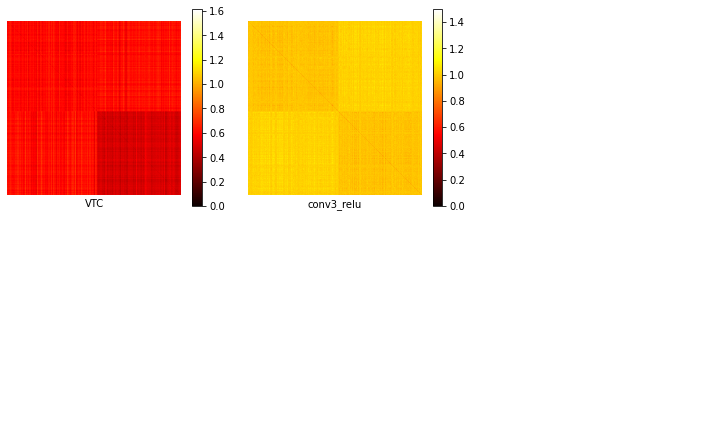

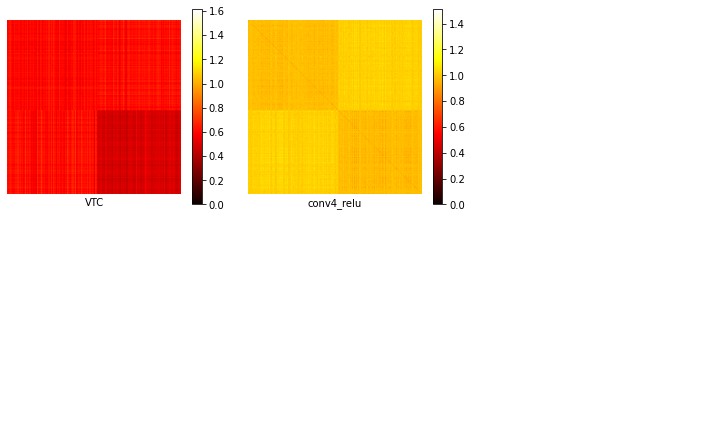

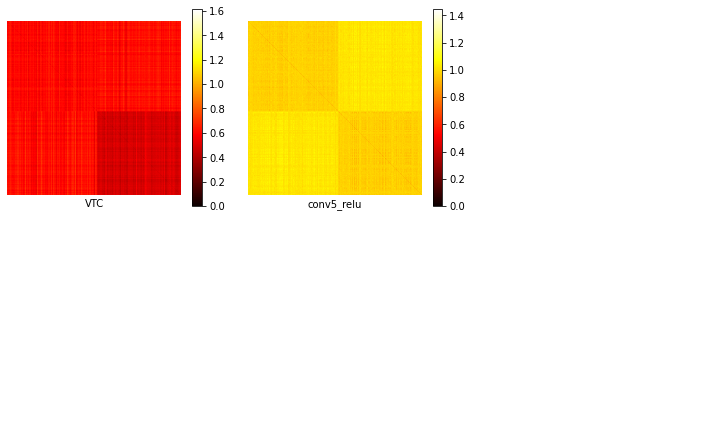

In [20]:
import numpy as np
from dnnbrain.dnn.core import RDM, Stimulus
from dnnbrain.utils.plot import imgarray_show

# load RDMs
for i in range(3, 6):
  brdm = RDM()
  brdm.load('beta_rh_VTC.rdm.h5')
  drdm = RDM()
  drdm.load('AlexNet_relu' + str(i) + '_zscore_PCA-100.rdm.h5')

  # get rearrange indices
  stim = Stimulus()
  stim.load('all_5000scenes.stim.csv')
  labels = stim.get('label')
  labels_uniq = np.unique(labels)
  indices = []
  for lbl in labels_uniq:
      indices.extend(np.where(labels == lbl)[0])

  # get brain RDM
  brdm_arr = brdm.get('1', False)
  brdm_arr = brdm_arr + brdm_arr.T
  rdm_arrs = [brdm_arr[indices][:, indices]]
  img_names = ['VTC']

  # get DNN RDMs
  layers = [f'conv' + str(i) + '_relu']
  img_names.extend(layers)
  for layer in layers:
      drdm_arr = drdm.get(layer, False)[0]
      drdm_arr = drdm_arr + drdm_arr.T
      rdm_arrs.append(drdm_arr[indices][:, indices])

  # plot
  imgarray_show(rdm_arrs, 2, 3, cmap='hot', cbar=True,
                frame_on=False, img_names=img_names)

In [21]:
from scipy.stats import pearsonr
from dnnbrain.dnn.core import RDM

for i in range(3, 6):
  # load RDMs
  brdm = RDM()
  brdm.load('beta_rh_VTC.rdm.h5')
  drdm = RDM()
  drdm.load('AlexNet_relu' + str(i) + '_zscore_PCA-100.rdm.h5')

  # calculate correlation between DNN RDMs and brain RDM.
  layers = [f'conv' + str(i) + '_relu']
  brdm_arr = brdm.get('1', True)
  for idx, layer in enumerate(layers):
      drdm_arr = drdm.get(layer, True)[0]
      corr = pearsonr(brdm_arr, drdm_arr)[0]
      print(f'VTC corr {layer}: {corr}')

VTC corr conv3_relu: 0.120767250492908
VTC corr conv4_relu: 0.1551068772516982
VTC corr conv5_relu: 0.16572927539153587


In [22]:
%cd /content/dnnbrain
!rm -rf brain dnn io utils viz __init__.py
%cd tutorial/map_dnn

/content/dnnbrain
/content/dnnbrain/tutorial/map_dnn


In [ ]:
## Visualize DNN ##

In [27]:
#add "all_5000scenes.stim.csv" from PC
%cd /content/dnnbrain/tutorial/visualize_dnn

/content/dnnbrain/tutorial/visualize_dnn


In [29]:
!dnn_topstim -net AlexNet -top 8 -stim all_5000scenes.stim.csv -layer conv5 -chn 122 -out .

Extracted activation of conv5: 8/4916
Extracted activation of conv5: 16/4916
Extracted activation of conv5: 24/4916
Extracted activation of conv5: 32/4916
Extracted activation of conv5: 40/4916
Extracted activation of conv5: 48/4916
Extracted activation of conv5: 56/4916
Extracted activation of conv5: 64/4916
Extracted activation of conv5: 72/4916
Extracted activation of conv5: 80/4916
Extracted activation of conv5: 88/4916
Extracted activation of conv5: 96/4916
Extracted activation of conv5: 104/4916
Extracted activation of conv5: 112/4916
Extracted activation of conv5: 120/4916
Extracted activation of conv5: 128/4916
Extracted activation of conv5: 136/4916
Extracted activation of conv5: 144/4916
Extracted activation of conv5: 152/4916
Extracted activation of conv5: 160/4916
Extracted activation of conv5: 168/4916
Extracted activation of conv5: 176/4916
Extracted activation of conv5: 184/4916
Extracted activation of conv5: 192/4916
Extracted activation of conv5: 200/4916
Extracted act

In [30]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

/content/dnnbrain/data/Presented_Stimuli/Scene/carFactory3.jpg
/content/dnnbrain/data/Presented_Stimuli/ImageNet/n04118776_32693.JPEG
/content/dnnbrain/data/Presented_Stimuli/ImageNet/n01629819_519.JPEG
/content/dnnbrain/data/Presented_Stimuli/COCO/COCO_train2014_000000136338.jpg
/content/dnnbrain/data/Presented_Stimuli/ImageNet/n02641379_15161.JPEG
/content/dnnbrain/data/Presented_Stimuli/COCO/COCO_train2014_000000415305.jpg
/content/dnnbrain/data/Presented_Stimuli/ImageNet/n02606052_3145.JPEG
/content/dnnbrain/data/Presented_Stimuli/ImageNet/n01531178_2651.JPEG
Images for channel 122


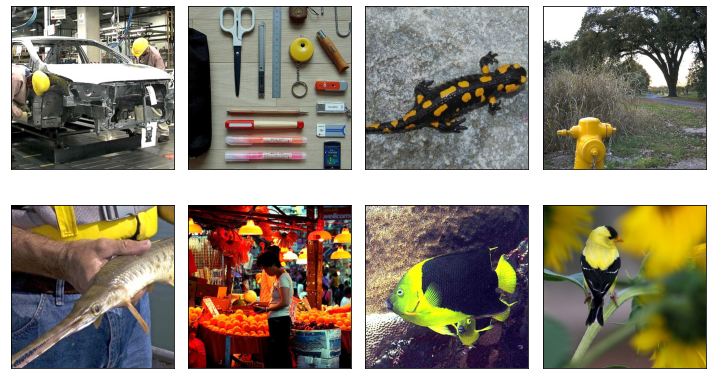

In [31]:
import numpy as np
import cv2 as cv 
from google.colab.patches import cv2_imshow

from os.path import join as pjoin
from matplotlib import pyplot as plt
from dnnbrain.dnn.core import Activation, Stimulus
from dnnbrain.utils.plot import imgarray_show

ids = [122];
file_names = ["conv5_chn122_top8.stim.csv"]

for i in range(1):
  stim = Stimulus()
  stim.load(file_names[i])
  img_arrs = []
  for j in range(8):
      ori_file = pjoin(stim.header['path'], stim.get('stimID')[j])   
      print(ori_file)   
      img_arrs.append(plt.imread(ori_file))

  print("Images for channel {}".format(ids[i]))
  imgarray_show(img_arrs, nrows=2, ncols=4)

In [32]:
### Occluder Map ###
import numpy as np
import matplotlib.pyplot as plt

from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import OccluderDiscrepancyMapping

# Prepare DNN and image
dnn = AlexNet()
image = plt.imread('/content/dnnbrain/data/Presented_Stimuli/ImageNet/n01629819_519.JPEG')
image = image.reshape(3, 375, 375)                 ##changed
#print(image.reshape(3, 375, 375).shape)
# Using slide-window (sw) method to display
# regions of the image that contribute to
# the activation of the 122th unit of conv5.
oc_estimator = OccluderDiscrepancyMapping(dnn, "conv5", 122)
oc_estimator.set_params(window=(11,11), stride=(2,2), metric='max')
img_out = oc_estimator.compute(image)

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('n01629819_519_rf_sw.JPEG')

Streaming output truncated to the last 5000 lines.
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extr

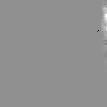

In [33]:
image = cv.imread('n01629819_519_rf_sw.JPEG')
cv2_imshow(image)

In [34]:
### Upsampling Map ###
import numpy as np
import matplotlib.pyplot as plt

from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import UpsamplingActivationMapping

# Prepare DNN and image
dnn = AlexNet()
image = plt.imread('/content/dnnbrain/data/Presented_Stimuli/ImageNet/n01629819_519.JPEG')
image = image.reshape(3, 375, 375)                 ##changed
# Using up-sampling(us) method to display
# regions of the image that contribute to
# the activation of the 122th unit of conv5.
up_estimator =UpsamplingActivationMapping(dnn, 'conv5', 122)
up_estimator.set_params(interp_meth='bicubic', interp_threshold=0.95)
img_out = up_estimator.compute(image)

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('n01629819_519_rf_us.JPEG')

Extracted activation of conv5: 1/1


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


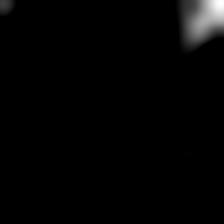

In [35]:
image = cv.imread('n01629819_519_rf_us.JPEG')
cv2_imshow(image)

In [36]:
### Empirical Map ###
### Run on CPU ###
from dnnbrain.dnn.base import ip
from dnnbrain.dnn.core import Stimulus
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import EmpiricalReceptiveField, UpsamplingActivationMapping

# Prepare DNN and stimulus
dnn = AlexNet()
stim = Stimulus()
stim.load('conv5_chn122_top8.stim.csv')

# Visualizing empirical receptive field using up-sampling(us) engine
# which displays the receptive field that contribute to
# the activation of the 122th unit of conv5.
up_estimator =UpsamplingActivationMapping(dnn, 'conv5', 122)
up_estimator.set_params(interp_meth='bicubic', interp_threshold=0.50)
emp_rf = EmpiricalReceptiveField(up_estimator)
img_out = emp_rf.compute(stim)

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('empirical_rf.JPEG')

Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1


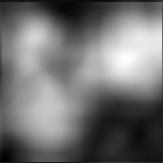

In [37]:
image = cv.imread('empirical_rf.JPEG')
cv2_imshow(image)

In [39]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py
%cd /content/dnnbrain/tutorial/visualize_dnn

/content/dnnbrain
rm: cannot remove 'brain': No such file or directory
rm: cannot remove 'dnn': No such file or directory
rm: cannot remove 'io': No such file or directory
rm: cannot remove 'utils': No such file or directory
rm: cannot remove 'viz': No such file or directory
rm: cannot remove '__init__.py': No such file or directory
/content/dnnbrain/tutorial/visualize_dnn


In [41]:
!dnn_topstim -net AlexNet -top 3 -stim color.stim.csv -layer conv5 -chn 122 -out .

Extracted activation of conv5: 8/10
Extracted activation of conv5: 10/10


In [42]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

/content/dnnbrain/data/colors/yellow.jpg
/content/dnnbrain/data/colors/orange.jpg
/content/dnnbrain/data/colors/green.jpg
Images for channel 122


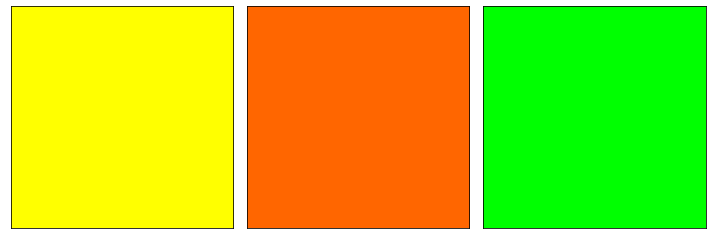

In [43]:
import numpy as np
import cv2 as cv 
from google.colab.patches import cv2_imshow

from os.path import join as pjoin
from matplotlib import pyplot as plt
from dnnbrain.dnn.core import Activation, Stimulus
from dnnbrain.utils.plot import imgarray_show

ids = [122];
file_names = ["conv5_chn122_top3.stim.csv"]

for i in range(1):
  stim = Stimulus()
  stim.load(file_names[i])
  img_arrs = []
  for j in range(3):
      ori_file = pjoin(stim.header['path'], stim.get('stimID')[j])   
      print(ori_file)   
      img_arrs.append(plt.imread(ori_file))

  print("Images for channel {}".format(ids[i]))
  imgarray_show(img_arrs, nrows=1, ncols=3)

In [44]:
### Occluder Map ###
import numpy as np
import matplotlib.pyplot as plt

from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import OccluderDiscrepancyMapping

# Prepare DNN and image
dnn = AlexNet()
image = plt.imread('/content/dnnbrain/data/colors/yellow.jpg')
image = image.reshape(3, 375, 375)                 ##changed
#print(image.reshape(3, 375, 375).shape)
# Using slide-window (sw) method to display
# regions of the image that contribute to
# the activation of the 122th unit of conv5.
oc_estimator = OccluderDiscrepancyMapping(dnn, "conv5", 122)
oc_estimator.set_params(window=(11,11), stride=(2,2), metric='max')
img_out = oc_estimator.compute(image)

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('yellow_rf_sw.JPEG')

Streaming output truncated to the last 5000 lines.
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extr

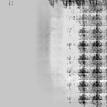

In [45]:
image = cv.imread('yellow_rf_sw.JPEG')
cv2_imshow(image)

In [46]:
### Upsampling Map ###
import numpy as np
import matplotlib.pyplot as plt

from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import UpsamplingActivationMapping

# Prepare DNN and image
dnn = AlexNet()
image = plt.imread('/content/dnnbrain/data/colors/yellow.jpg')
image = image.reshape(3, 375, 375)                 ##changed
# Using up-sampling(us) method to display
# regions of the image that contribute to
# the activation of the 122th unit of conv5.
up_estimator =UpsamplingActivationMapping(dnn, 'conv5', 122)
up_estimator.set_params(interp_meth='bicubic', interp_threshold=0.95)
img_out = up_estimator.compute(image)

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('yellow_rf_us.JPEG')

Extracted activation of conv5: 1/1


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


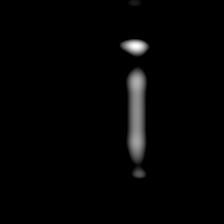

In [47]:
image = cv.imread('yellow_rf_us.JPEG')
cv2_imshow(image)

In [48]:
### Empirical Map ###
### Run on CPU ###
from dnnbrain.dnn.base import ip
from dnnbrain.dnn.core import Stimulus
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import EmpiricalReceptiveField, UpsamplingActivationMapping

# Prepare DNN and stimulus
dnn = AlexNet()
stim = Stimulus()
stim.load('conv5_chn122_top3.stim.csv')

# Visualizing empirical receptive field using up-sampling(us) engine
# which displays the receptive field that contribute to
# the activation of the 122th unit of conv5.
up_estimator =UpsamplingActivationMapping(dnn, 'conv5', 122)
up_estimator.set_params(interp_meth='bicubic', interp_threshold=0.50)
emp_rf = EmpiricalReceptiveField(up_estimator)
img_out = emp_rf.compute(stim)

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('empirical_rf_color.JPEG')

Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1
Extracted activation of conv5: 1/1


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


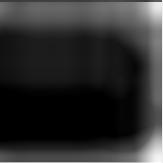

In [49]:
image = cv.imread('empirical_rf_color.JPEG')
cv2_imshow(image)

In [50]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py

/content/dnnbrain
